# Proyecto para analizar los partidos de ATP desde 2008 hasta 2021
1. Se tendrán en cuenta las 3 superficies
2. Primero se hará un análisis general y luego del Big Three

In [1]:
# Para la manipulación de datos 
import pandas as pd 
import numpy as np 

# Para el análisis de la muestra 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 



## Extracción de datos 

In [2]:
# Leemos el archivo 

df = pd.read_csv(r'C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Tennis\tennis_data.csv', low_memory= False)
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,KOR,2015.0,72.0,180.0,Right-Handed,JPN,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,BRA,2011.0,78.0,183.0,Left-Handed,GER,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,SRB,2013.0,80.0,185.0,Right-Handed,ESP,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,USA,2012.0,86.0,188.0,Right-Handed,AUS,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,FRA,2016.0,71.0,175.0,Left-Handed,DEN,2020.0,77.0,188.0,Right-Handed


## Limpieza de datos

In [3]:
# Obtenemos información del dataset

print('El dataset tiene', df.shape, 'de dimensiones')

El dataset tiene (35923, 54) de dimensiones


In [4]:
# Vemos los tipos de datos que tiene 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35923 entries, 0 to 35922
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATP           35923 non-null  int64  
 1   Location      35923 non-null  object 
 2   Tournament    35923 non-null  object 
 3   Date          35923 non-null  object 
 4   Series        35923 non-null  object 
 5   Court         35923 non-null  object 
 6   Surface       35923 non-null  object 
 7   Round         35923 non-null  object 
 8   Best of       35923 non-null  int64  
 9   Winner        35923 non-null  object 
 10  Loser         35923 non-null  object 
 11  WRank         35910 non-null  float64
 12  LRank         35843 non-null  float64
 13  WPts          35912 non-null  float64
 14  LPts          35844 non-null  float64
 15  W1            35692 non-null  float64
 16  L1            35695 non-null  float64
 17  W2            35353 non-null  float64
 18  L2            35353 non-nu

In [5]:
# Vemos las columnas que tiene para saber si no necesitamos algunas

df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',
       'pl1_flag', 'pl1_year_pro', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_flag', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand'],
      dtype='object')

In [6]:
# Eliminamos las columnas no necesarias 

df = df.drop(columns=['B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',  'pl1_flag', 'pl2_flag'])
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,0.0,Completed,2015.0,72.0,180.0,Right-Handed,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,1.0,Completed,2011.0,78.0,183.0,Left-Handed,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,0.0,Completed,2013.0,80.0,185.0,Right-Handed,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,1.0,Completed,2012.0,86.0,188.0,Right-Handed,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,0.0,Completed,2016.0,71.0,175.0,Left-Handed,2020.0,77.0,188.0,Right-Handed


In [48]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'pl1_year_pro', 'pl1_weight', 'pl1_height',
       'pl1_hand', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand'],
      dtype='object')

## Visualización de los datos

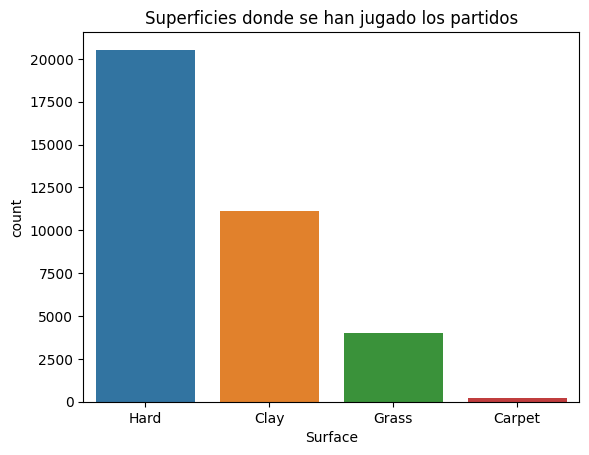

In [7]:
# Distribución de la superficie de los partidos 

sns.countplot(df, x= 'Surface')
plt.title('Superficies donde se han jugado los partidos');


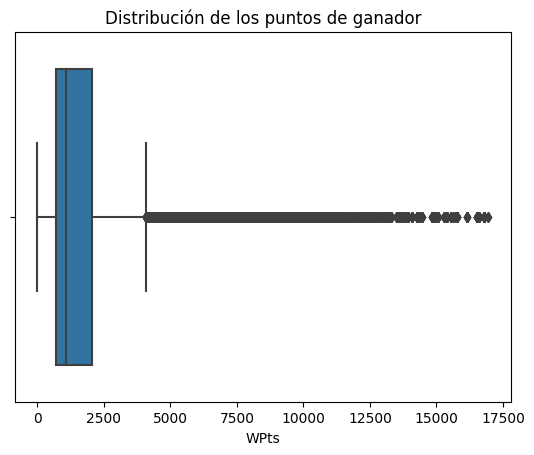

In [8]:
# Distribución de los puntos de los ganadores 

sns.boxplot(df, x = df.WPts)
plt.title('Distribución de los puntos de ganador');

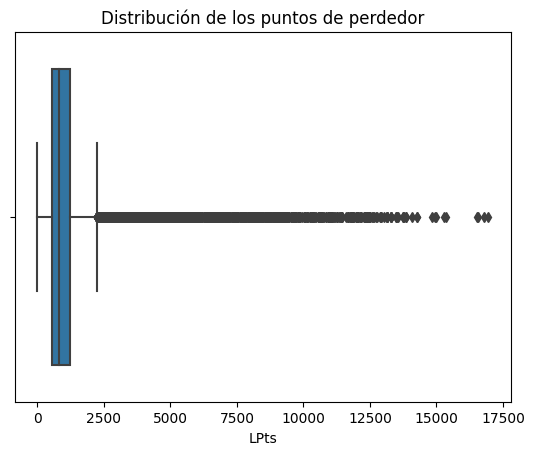

In [10]:
# Distribución de los puntos de los ganadores 

sns.boxplot(df, x = df.LPts)
plt.title('Distribución de los puntos de perdedor');

In [9]:
df.WPts.describe()

count    35912.000000
mean      1976.910977
std       2411.581458
min          1.000000
25%        701.000000
50%       1079.000000
75%       2050.000000
max      16950.000000
Name: WPts, dtype: float64

In [11]:
df.LPts.describe()

count    35844.000000
mean      1142.708905
std       1301.782291
min          1.000000
25%        549.000000
50%        805.000000
75%       1225.000000
max      16950.000000
Name: LPts, dtype: float64

<AxesSubplot:xlabel='WPts', ylabel='Density'>

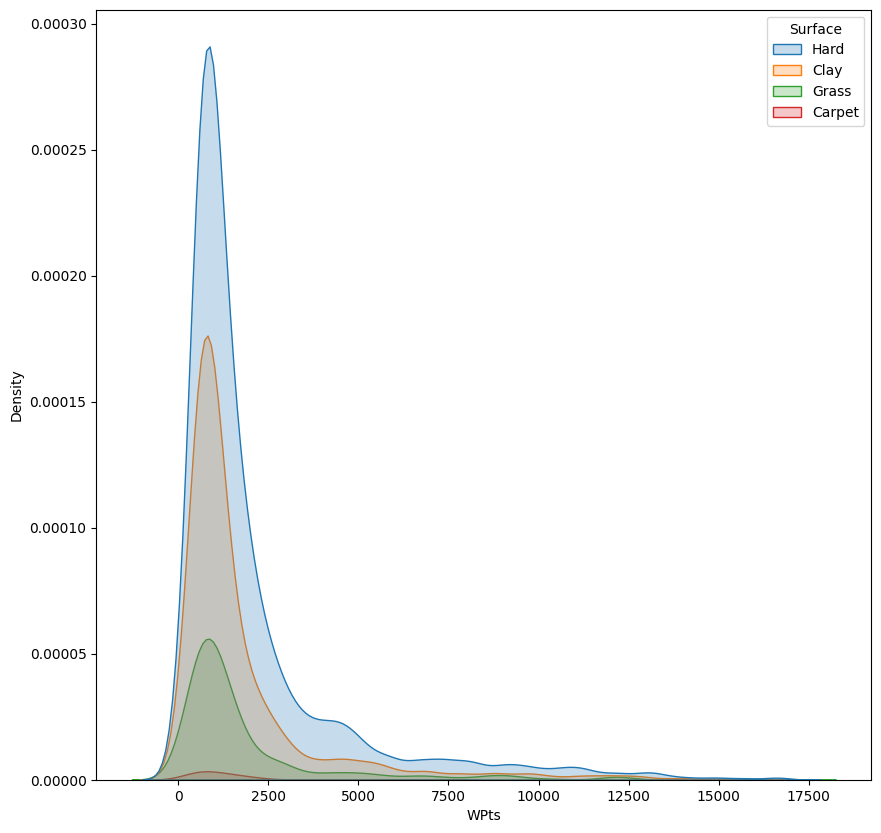

In [30]:
# Analisis de los puntos para ganar deèndiendo de la supeerficie

hue = df.Surface
plt.figure(figsize=(10,10))
sns.kdeplot(x= df.WPts, hue=hue, fill=True)